# Обучение YOLO для сегментации частей автомобиля

In [1]:
import random
import glob
import matplotlib.pyplot as plt
from PIL import Image

## Обучение модели

In [2]:
!pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.133 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6361.9/8062.4 GB disk)


In [3]:
from ultralytics import YOLO

model = YOLO("yolo11m-seg.pt")

100%|██████████| 43.3M/43.3M [00:00<00:00, 227MB/s]


In [4]:
results = model.train(data="/kaggle/input/russian-data/new_data.yaml", epochs=100, imgsz=640, batch=16, patience=15)

Ultralytics 8.3.133 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/russian-data/new_data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=15, perspective=0.0, plots=True, pose=

100%|██████████| 22.2M/22.2M [00:00<00:00, 182MB/s]


Overriding model.yaml nc=80 with nc=13

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           
  7                  -1  1   2360320  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 74.2MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 7.0±5.0 MB/s, size: 35.6 KB)


train: Scanning /kaggle/input/yolo-russian-classes/carparts-seg/train/labels... 3156 images, 116 backgrounds, 0 corrupt: 100%|██████████| 3156/3156 [00:09<00:00, 333.18it/s]


WARNING ⚠️ train: Cache directory /kaggle/input/yolo-russian-classes/carparts-seg/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 13.3±1.8 MB/s, size: 39.3 KB)


val: Scanning /kaggle/input/yolo-russian-classes/carparts-seg/valid/labels... 401 images, 12 backgrounds, 0 corrupt: 100%|██████████| 401/401 [00:01<00:00, 313.86it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/yolo-russian-classes/carparts-seg/valid is not writeable, cache not saved.


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000588, momentum=0.9) with parameter groups 115 weight(decay=0.0), 126 weight(decay=0.0005), 125 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      9.56G      1.711      3.848      4.432      1.927        152        640:   1%|          | 1/198 [00:02<09:47,  2.98s/it]

      1/100      9.56G      1.696      4.053      4.432      1.939        109        640:   1%|          | 2/198 [00:03<05:27,  1.67s/it]
100%|██████████| 755k/755k [00:00<00:00, 16.3MB/s]
      1/100      9.65G      1.041       2.08      1.901      1.276         31        640: 100%|██████████| 198/198 [02:30<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.44it/s]

                   all        401       2042      0.581      0.542      0.557      0.401       0.57      0.524      0.537      0.345



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      9.86G      0.964      1.774      1.202      1.188         24        640: 100%|██████████| 198/198 [02:30<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.42it/s]

                   all        401       2042      0.609      0.572      0.598      0.422       0.61      0.574        0.6      0.391



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      9.77G     0.9703       1.77      1.143      1.191         54        640: 100%|██████████| 198/198 [02:30<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.45it/s]

                   all        401       2042      0.633      0.609      0.634      0.456      0.638      0.582      0.601      0.369



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      9.83G     0.9519      1.708      1.085      1.175         26        640: 100%|██████████| 198/198 [02:30<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.46it/s]

                   all        401       2042      0.591      0.697       0.67      0.497      0.604      0.699      0.676      0.477



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      9.93G     0.9174      1.628       1.01      1.153         27        640: 100%|██████████| 198/198 [02:30<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.46it/s]

                   all        401       2042      0.622      0.694      0.686      0.532       0.63      0.698      0.695      0.505



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100       9.9G      0.874      1.524     0.9282      1.126         31        640: 100%|██████████| 198/198 [02:30<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.49it/s]

                   all        401       2042      0.611      0.745      0.714      0.552      0.613       0.75      0.723      0.525



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      9.97G     0.8464      1.458     0.8767      1.107         31        640: 100%|██████████| 198/198 [02:30<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.49it/s]

                   all        401       2042      0.621       0.82      0.731      0.567      0.638      0.803      0.749      0.557



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      9.82G     0.8228      1.421     0.8486      1.094         43        640: 100%|██████████| 198/198 [02:30<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.49it/s]

                   all        401       2042      0.681      0.783       0.76      0.613      0.684      0.785      0.766      0.595



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      9.94G     0.8064       1.38     0.8121      1.086         30        640: 100%|██████████| 198/198 [02:31<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.46it/s]

                   all        401       2042      0.659      0.815       0.76      0.618      0.669      0.819      0.771      0.595



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      9.89G     0.7802      1.329     0.7761      1.071         33        640: 100%|██████████| 198/198 [02:34<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.47it/s]

                   all        401       2042      0.686      0.815      0.769      0.616      0.719      0.804       0.78        0.6



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      9.89G     0.7735      1.314      0.767      1.064         54        640: 100%|██████████| 198/198 [02:34<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.47it/s]

                   all        401       2042      0.712      0.795      0.776      0.632      0.719      0.806      0.784      0.612



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      9.79G     0.7611       1.27     0.7344      1.057         45        640: 100%|██████████| 198/198 [02:34<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.47it/s]

                   all        401       2042      0.695      0.837       0.78      0.642      0.701      0.835      0.791      0.629



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      9.84G     0.7497      1.246     0.7241      1.044         40        640: 100%|██████████| 198/198 [02:34<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.47it/s]

                   all        401       2042      0.736      0.814       0.79      0.649      0.745      0.817      0.803      0.639



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      9.92G     0.7407       1.23     0.7048      1.044         39        640: 100%|██████████| 198/198 [02:34<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.48it/s]

                   all        401       2042      0.766      0.755      0.777      0.644      0.776      0.762      0.791      0.626



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      9.85G     0.7263      1.207     0.6995      1.032         42        640: 100%|██████████| 198/198 [02:34<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.47it/s]

                   all        401       2042      0.682      0.829       0.79      0.659      0.687      0.838      0.804      0.651



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      9.83G     0.7068      1.179     0.6654      1.022         56        640: 100%|██████████| 198/198 [02:31<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.50it/s]

                   all        401       2042      0.729      0.833      0.783      0.653      0.742      0.831      0.799      0.644



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      9.93G     0.7039      1.165     0.6625      1.026         35        640: 100%|██████████| 198/198 [02:30<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.51it/s]

                   all        401       2042      0.689      0.851      0.788      0.656      0.692      0.868      0.801       0.64



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      9.77G     0.6942       1.15     0.6397      1.015         45        640: 100%|██████████| 198/198 [02:30<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.50it/s]

                   all        401       2042      0.671      0.854      0.798       0.67      0.676      0.864      0.808      0.653



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      9.89G     0.6924      1.146     0.6443      1.014         46        640: 100%|██████████| 198/198 [02:30<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.51it/s]

                   all        401       2042      0.714      0.852      0.801      0.671       0.72      0.852      0.816      0.659



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      9.78G      0.674      1.121     0.6279      1.005         49        640: 100%|██████████| 198/198 [02:30<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.51it/s]

                   all        401       2042      0.719      0.832      0.804      0.685      0.727      0.843       0.82      0.672



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      9.91G     0.6683      1.102     0.6153      1.001         24        640: 100%|██████████| 198/198 [02:30<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.50it/s]

                   all        401       2042      0.728      0.849      0.801      0.679      0.739      0.863      0.819      0.668



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      9.95G     0.6658      1.088     0.6077     0.9954         20        640: 100%|██████████| 198/198 [02:30<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.50it/s]

                   all        401       2042      0.733      0.837      0.803      0.676       0.75       0.82      0.816      0.665



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100       9.8G      0.651      1.052     0.5882     0.9918         47        640: 100%|██████████| 198/198 [02:30<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.50it/s]

                   all        401       2042      0.723      0.814      0.816      0.689      0.731      0.826      0.831      0.673



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      9.74G     0.6428      1.036     0.5789     0.9864         58        640: 100%|██████████| 198/198 [02:30<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.49it/s]

                   all        401       2042      0.717      0.878      0.819      0.694      0.728      0.864      0.835      0.682



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100       9.8G     0.6418      1.032     0.5755     0.9868         51        640: 100%|██████████| 198/198 [02:30<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.50it/s]

                   all        401       2042      0.754      0.806      0.814      0.694      0.769      0.807      0.826      0.681



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      9.78G     0.6283      1.004     0.5615     0.9783         54        640: 100%|██████████| 198/198 [02:30<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.50it/s]

                   all        401       2042      0.775      0.815      0.822       0.71       0.79       0.83      0.843      0.691



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      9.84G     0.6224      1.006     0.5586     0.9737         36        640: 100%|██████████| 198/198 [02:30<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.49it/s]

                   all        401       2042      0.799      0.815      0.826       0.71      0.815      0.832      0.848      0.695



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      9.74G     0.6183      0.997     0.5505     0.9725         36        640: 100%|██████████| 198/198 [02:30<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.50it/s]

                   all        401       2042      0.804      0.802      0.821      0.705      0.815      0.814      0.844      0.691



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      9.93G      0.618      0.987     0.5485      0.971         32        640: 100%|██████████| 198/198 [02:30<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.51it/s]

                   all        401       2042      0.724      0.823      0.804      0.698      0.734      0.838      0.822      0.681



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      9.78G     0.6088     0.9772     0.5421     0.9669         32        640: 100%|██████████| 198/198 [02:30<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.50it/s]

                   all        401       2042      0.801      0.831      0.837      0.721      0.811      0.839      0.856      0.707



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      9.77G     0.6057      0.981     0.5347     0.9659         42        640: 100%|██████████| 198/198 [02:30<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.46it/s]

                   all        401       2042      0.743      0.842       0.82      0.706      0.755      0.849      0.836      0.689



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      9.76G     0.5977     0.9592     0.5225     0.9604         41        640: 100%|██████████| 198/198 [02:34<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.47it/s]

                   all        401       2042      0.747      0.817      0.803      0.697      0.768      0.811      0.819      0.687



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      9.87G     0.5979     0.9459     0.5195     0.9556         58        640: 100%|██████████| 198/198 [02:34<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.48it/s]

                   all        401       2042      0.743      0.853      0.817      0.711       0.76      0.868      0.839      0.697



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      9.97G     0.5953     0.9559     0.5202     0.9554         42        640: 100%|██████████| 198/198 [02:34<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.48it/s]

                   all        401       2042      0.728      0.816      0.799      0.694      0.738      0.819      0.814      0.679



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      9.91G     0.5889     0.9428     0.5067     0.9546         35        640: 100%|██████████| 198/198 [02:34<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.47it/s]

                   all        401       2042      0.776      0.827      0.831      0.721      0.794      0.844      0.853      0.706



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      9.82G     0.5878       0.93     0.5039     0.9577         47        640: 100%|██████████| 198/198 [02:34<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.48it/s]

                   all        401       2042       0.73      0.839      0.811      0.709      0.736      0.844      0.824      0.692



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      9.87G     0.5795     0.9204     0.4982     0.9528         32        640: 100%|██████████| 198/198 [02:34<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.48it/s]

                   all        401       2042       0.72      0.842      0.798      0.701       0.74      0.831      0.811       0.68



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      9.86G     0.5758     0.9218     0.4947     0.9487         18        640: 100%|██████████| 198/198 [02:32<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.50it/s]

                   all        401       2042      0.701      0.875      0.794        0.7      0.705      0.883      0.801      0.682



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      9.92G     0.5698     0.9015     0.4895     0.9454         23        640: 100%|██████████| 198/198 [02:30<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.51it/s]

                   all        401       2042       0.75      0.805      0.803      0.705      0.751       0.83      0.818      0.689



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      9.74G      0.565     0.8999     0.4778     0.9439         38        640: 100%|██████████| 198/198 [02:30<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.51it/s]

                   all        401       2042       0.73      0.849      0.813      0.709      0.752       0.86      0.835      0.695



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      9.88G     0.5534     0.8783     0.4712     0.9383         24        640: 100%|██████████| 198/198 [02:30<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.51it/s]

                   all        401       2042      0.705      0.859      0.793      0.699      0.718      0.864      0.808      0.687



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      9.75G     0.5522     0.8724     0.4617      0.938         48        640: 100%|██████████| 198/198 [02:30<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.51it/s]

                   all        401       2042      0.708      0.796      0.778      0.688      0.718       0.81      0.794      0.668



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      9.89G     0.5543     0.8762     0.4654     0.9396         31        640: 100%|██████████| 198/198 [02:30<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.51it/s]

                   all        401       2042      0.751      0.828      0.809      0.711      0.766      0.839      0.827      0.695



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      9.77G     0.5459     0.8625     0.4594     0.9335         41        640: 100%|██████████| 198/198 [02:30<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.51it/s]

                   all        401       2042      0.753      0.825      0.818       0.72      0.763      0.837      0.834      0.703



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      9.96G     0.5445     0.8638      0.447     0.9348         13        640: 100%|██████████| 198/198 [02:30<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.51it/s]

                   all        401       2042      0.741      0.848      0.807      0.711      0.749      0.861      0.824      0.697
EarlyStopping: Training stopped early as no improvement observed in last 15 epochs. Best results observed at epoch 30, best model saved as best.pt.
To update EarlyStopping(patience=15) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



45 epochs completed in 2.021 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 45.2MB
Optimizer stripped from runs/segment/train/weights/best.pt, 45.2MB

Validating runs/segment/train/weights/best.pt...
Ultralytics 8.3.133 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m-seg summary (fused): 138 layers, 22,345,335 parameters, 0 gradients, 123.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   8%|▊         | 1/13 [00:00<00:08,  1.44it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  15%|█▌        | 2/13 [00:01<00:09,  1.17it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.21it/s]


                   all        401       2042      0.802      0.831      0.837       0.72      0.811      0.839      0.855      0.707
         задний_бампер         94         94      0.904      0.936      0.954      0.823      0.904      0.936      0.947       0.79
          задняя_дверь        185        186      0.892      0.932      0.938       0.85      0.892      0.932      0.938      0.845
         заднее_стекло        114        115      0.933      0.939      0.968      0.852      0.933      0.939      0.968      0.824
           задняя_фара        185        258      0.915      0.831      0.904      0.706      0.923      0.839      0.909      0.672
       передний_бампер        208        208      0.913      0.964       0.97      0.898      0.913      0.964       0.97      0.891
        передняя_дверь        194        194      0.855      0.995      0.942      0.872      0.855      0.995      0.942      0.848
        лобовое_стекло        214        214      0.914      0.995   

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.3ms preprocess, 14.6ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/segment/train


In [13]:
!zip -r /kaggle/working/runs.zip /kaggle/working/runs

  adding: kaggle/working/runs/ (stored 0%)
  adding: kaggle/working/runs/segment/ (stored 0%)
  adding: kaggle/working/runs/segment/train/ (stored 0%)
  adding: kaggle/working/runs/segment/train/args.yaml (deflated 53%)
  adding: kaggle/working/runs/segment/train/labels.jpg (deflated 17%)
  adding: kaggle/working/runs/segment/train/val_batch0_labels.jpg (deflated 7%)
  adding: kaggle/working/runs/segment/train/MaskP_curve.png (deflated 4%)
  adding: kaggle/working/runs/segment/train/BoxPR_curve.png (deflated 9%)
  adding: kaggle/working/runs/segment/train/val_batch2_labels.jpg (deflated 8%)
  adding: kaggle/working/runs/segment/train/labels_correlogram.jpg (deflated 34%)
  adding: kaggle/working/runs/segment/train/BoxF1_curve.png (deflated 4%)
  adding: kaggle/working/runs/segment/train/val_batch1_pred.jpg (deflated 7%)
  adding: kaggle/working/runs/segment/train/train_batch0.jpg (deflated 2%)
  adding: kaggle/working/runs/segment/train/results.csv (deflated 62%)
  adding: kaggle/worki

## Анализ работы модели

In [11]:
from ultralytics import YOLO

model = YOLO("./car_parts_yolo11/working/runs/segment/train/weights/best.pt")

### Примеры работы модели

In [ ]:
test_images_path = "./carparts-seg/test/images/*.jpg"
all_images = glob.glob(test_images_path)

sampled_images = random.sample(all_images, 3)

results = model.predict(sampled_images, save=False, imgsz=640, conf=0.3)


0: 640x640 1 задняя_дверь, 1 задняя_фара, 1 передняя_дверь, 1 передняя_фара, 1 правое_зеркало, 1 багажник, 1 колесо, 343.3ms
1: 640x640 1 задняя_дверь, 1 задняя_фара, 1 передний_бампер, 1 передняя_дверь, 1 лобовое_стекло, 2 передняя_фараs, 1 капот, 1 левое_зеркало, 1 правое_зеркало, 2 колесоs, 343.3ms
2: 640x640 1 задняя_дверь, 1 передний_бампер, 1 передняя_дверь, 1 лобовое_стекло, 1 передняя_фара, 1 капот, 1 левое_зеркало, 1 правое_зеркало, 1 колесо, 343.3ms
Speed: 1.3ms preprocess, 343.3ms inference, 11.1ms postprocess per image at shape (1, 3, 640, 640)


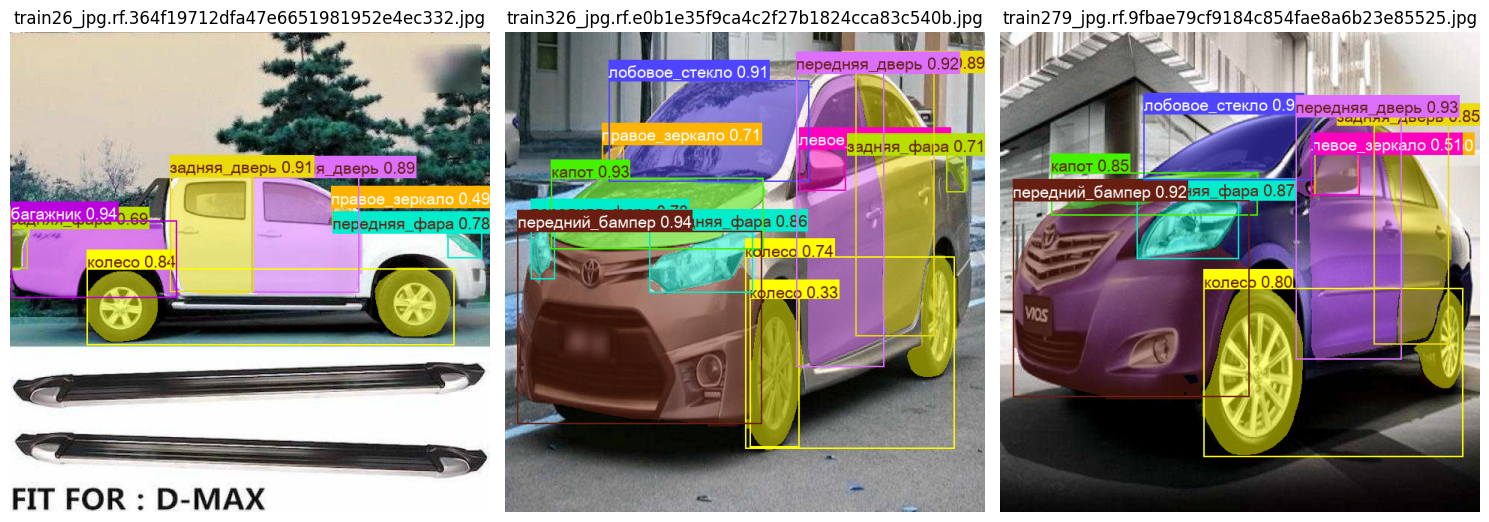

In [ ]:
plt.figure(figsize=(15, 15))
for i, r in enumerate(results):
    im_array = r.plot()
    plt.subplot(1, 3, i + 1)
    plt.imshow(im_array)
    plt.axis("off")
    plt.title(sampled_images[i].split("/")[-1])
plt.tight_layout()
plt.show()

Модель хорошо распознаёт основные части автомобилей — двери, капот, бампер и стёкла с высокой точностью. Ошибки возникают на зеркалах (низкая уверенность) и иногда появляются дублирующие боксы, особенно на колёсах.

### Анализ работы модели по основным графикам метрик и графикам обучения

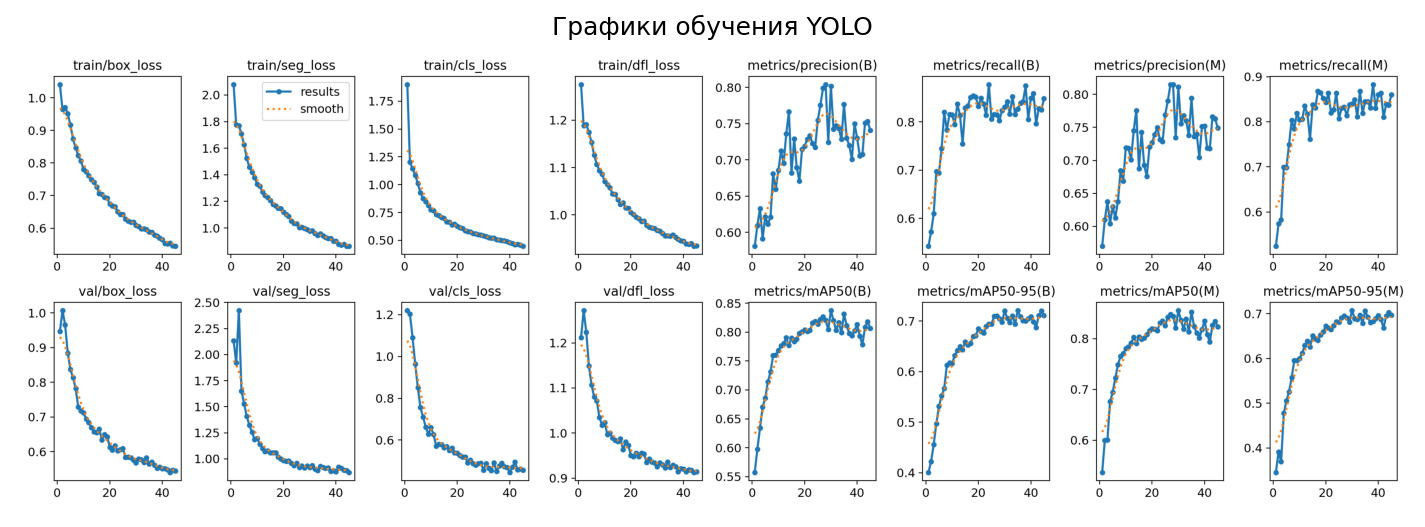

In [8]:
from PIL import Image
import matplotlib.pyplot as plt

img_path = "./car_parts_yolo11/working/runs/segment/train/results.png"

img = Image.open(img_path)
plt.figure(figsize=(12, 6), dpi=150)
plt.imshow(img)
plt.axis("off")
plt.title("Графики обучения YOLO")
plt.show()


Модель показывает стабильное обучение. Все лоссы (box, seg, cls, dfl) по train и val плавно снижаются, без расхождений, что говорит об отсутствии переобучения. Метрики `mAP50` и `mAP50-95` как для bounding box, так и масок устойчиво растут и стабилизируются на уровне ~0.85 (mAP50) и ~0.70 (mAP50-95). Precision и recall также растут. Модель хорошо научилась как находить, так и сегментировать автомобильные части. Обучение модели было остановлено, так как основные метрики и графики функции потерь вышли на плато и лосс перестал снижаться

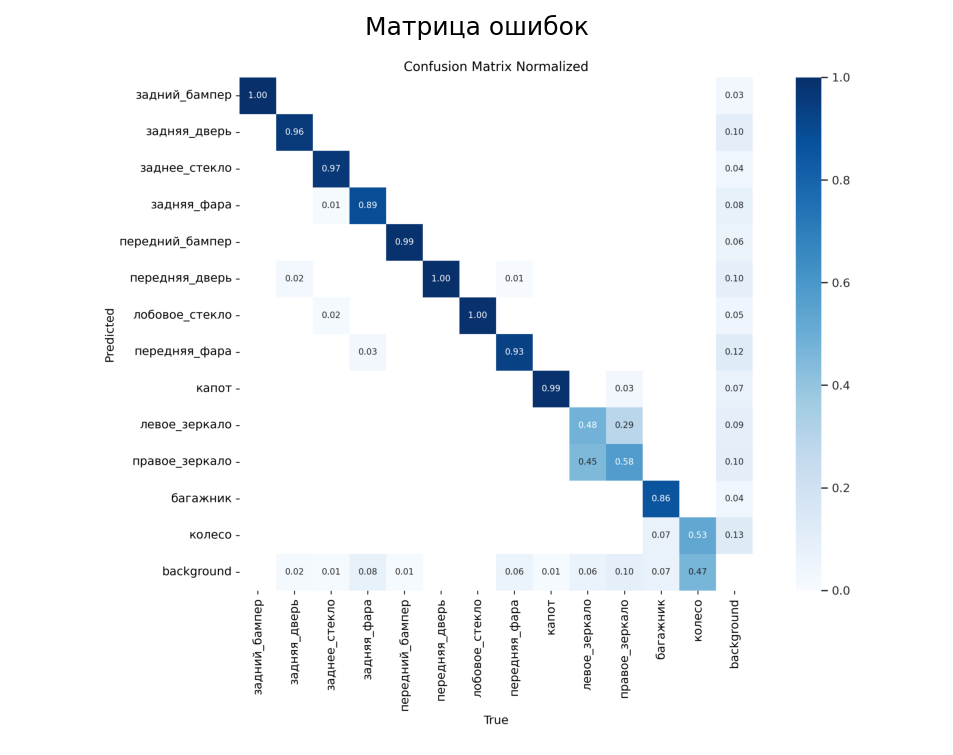

In [7]:
from PIL import Image
import matplotlib.pyplot as plt

img_path = "./car_parts_yolo11/working/runs/segment/train/confusion_matrix_normalized.png"

img = Image.open(img_path)
plt.figure(figsize=(12, 6), dpi=150)
plt.imshow(img)
plt.axis("off")
plt.title("Матрица ошибок")
plt.show()


Модель отлично распознаёт крупные элементы автомобиля, такие как бамперы, двери, стекло и капот — их точность достигает 95–100%. Основные ошибки приходятся на зеркала и колёса: эти классы часто путаются между собой и с фоном, вероятно из-за их небольшого размера, схожей формы и симметрии. Также наблюдаются ложные срабатывания на фон, особенно для редких классов. Для улучшения качества возможно стоит объединить зеркала в один класс и собрать больше примеров для слабых категорий